**Introduction:**

This script helps create network plots based on the "Person to Person" dataset with NetworkX.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

Make sure that NetworkX works with a small dataset with only few nodes and edges.

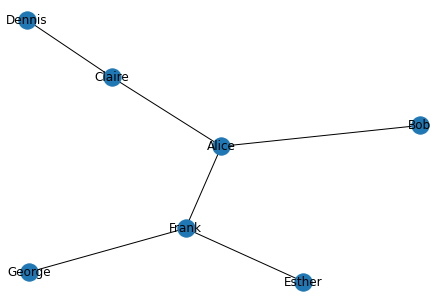

In [2]:
## Small dataset with networkx
NetxG=nx.Graph()
NetxG.add_nodes_from(["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"])
#NetxG.add_edge(2, 3)
NetxG.add_edges_from([("Alice","Bob"),("Alice","Claire"),("Claire","Dennis")
        ,("Dennis","Claire"),("Alice","Frank"),("George","Frank"),("Esther","Frank")])
#print(list(NetxG.nodes))
#print(list(NetxG.edges))
nx.draw(NetxG,with_labels=True) 

There were so many people only appear once and making it relatively harder to interprete the plots, so I dropped those names because the whole idea of this script was to practice building network plots with NetworkX. Hence I created the following cell to do that job.

In [3]:
# Larger data preperation - SNA of Trump's Person-Person Edge List
# Edgelist & Adjacency list is created by myself with the dataset above
df1=pd.read_csv("Person_Person.csv",encoding = "ISO-8859-1")
p_a=df1['Person A']
p_b=df1['Person B']
df2=pd.concat([p_a,p_b],axis=0)    
df2_l=df2.values.tolist() # To count the frequency of names
# Filter vertices - each one must know 2 or more people
output = [] # Get unique values 
for x in p_a:
    if x not in output:
        output.append(x)
for x in p_b:
    if x not in output:
        output.append(x)
#print (output)
df3=pd.DataFrame(output)
cnt=[]
for x in output:
    cnt.append(df2_l.count(x))
df3['cnt']=cnt # Add a new column of frequency of the names
df4=df3
df4=df4.drop(df3[df3.cnt>1].index) # Get the list the vertices with only 1 target
df4_l=df4[0].values.tolist()# list the vertices with only 1 target
# Drop the names who only know one person
for x in df4_l:
    df1=df1[~df1['Person A'].str.contains(x)]
    df1=df1[~df1['Person B'].str.contains(x)]
p_a1=df1['Person A'].values.tolist()
p_b1=df1['Person B'].values.tolist()
output2 = [] # Get unique values again
for x in p_a1:
    if x not in output2:
        output2.append(x)
for x in p_b1:
    if x not in output2:
        output2.append(x)
# The number of viterces has been reduced from 232 to 89

Here with the edgelist I created, the most basic network plot can be done. 

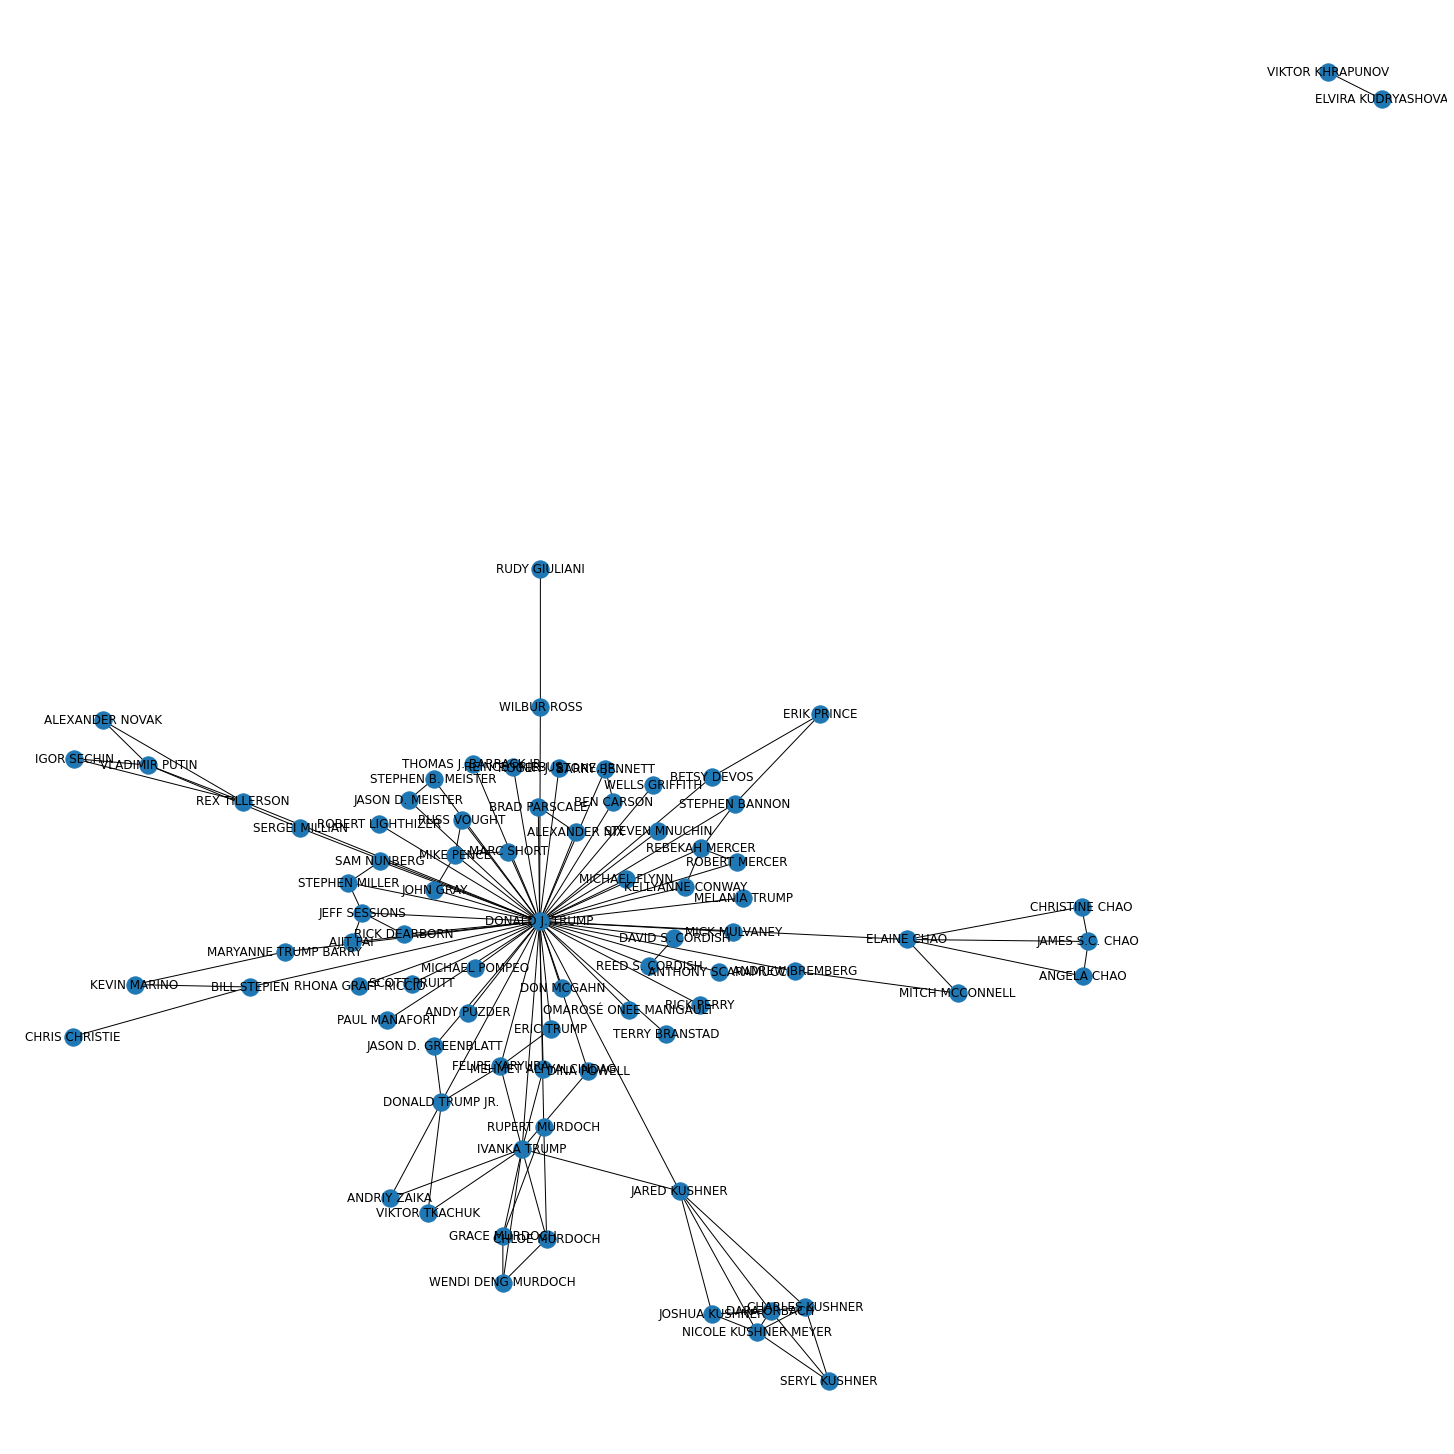

In [4]:
## networkx - edgelist
l=list(zip(p_a1,p_b1)) # EDGELIST
NetxG1 = nx.Graph()
NetxG1.add_nodes_from(output2)
NetxG1.add_edges_from(l)
#print(list(NetxG1.nodes))
#print(list(NetxG1.edges))
plt.figure(figsize=(20,20)) 
nx.draw(NetxG1,with_labels=True)
plt.show()

Also we can add weights and arrows to the edges to make it a direted network plot.

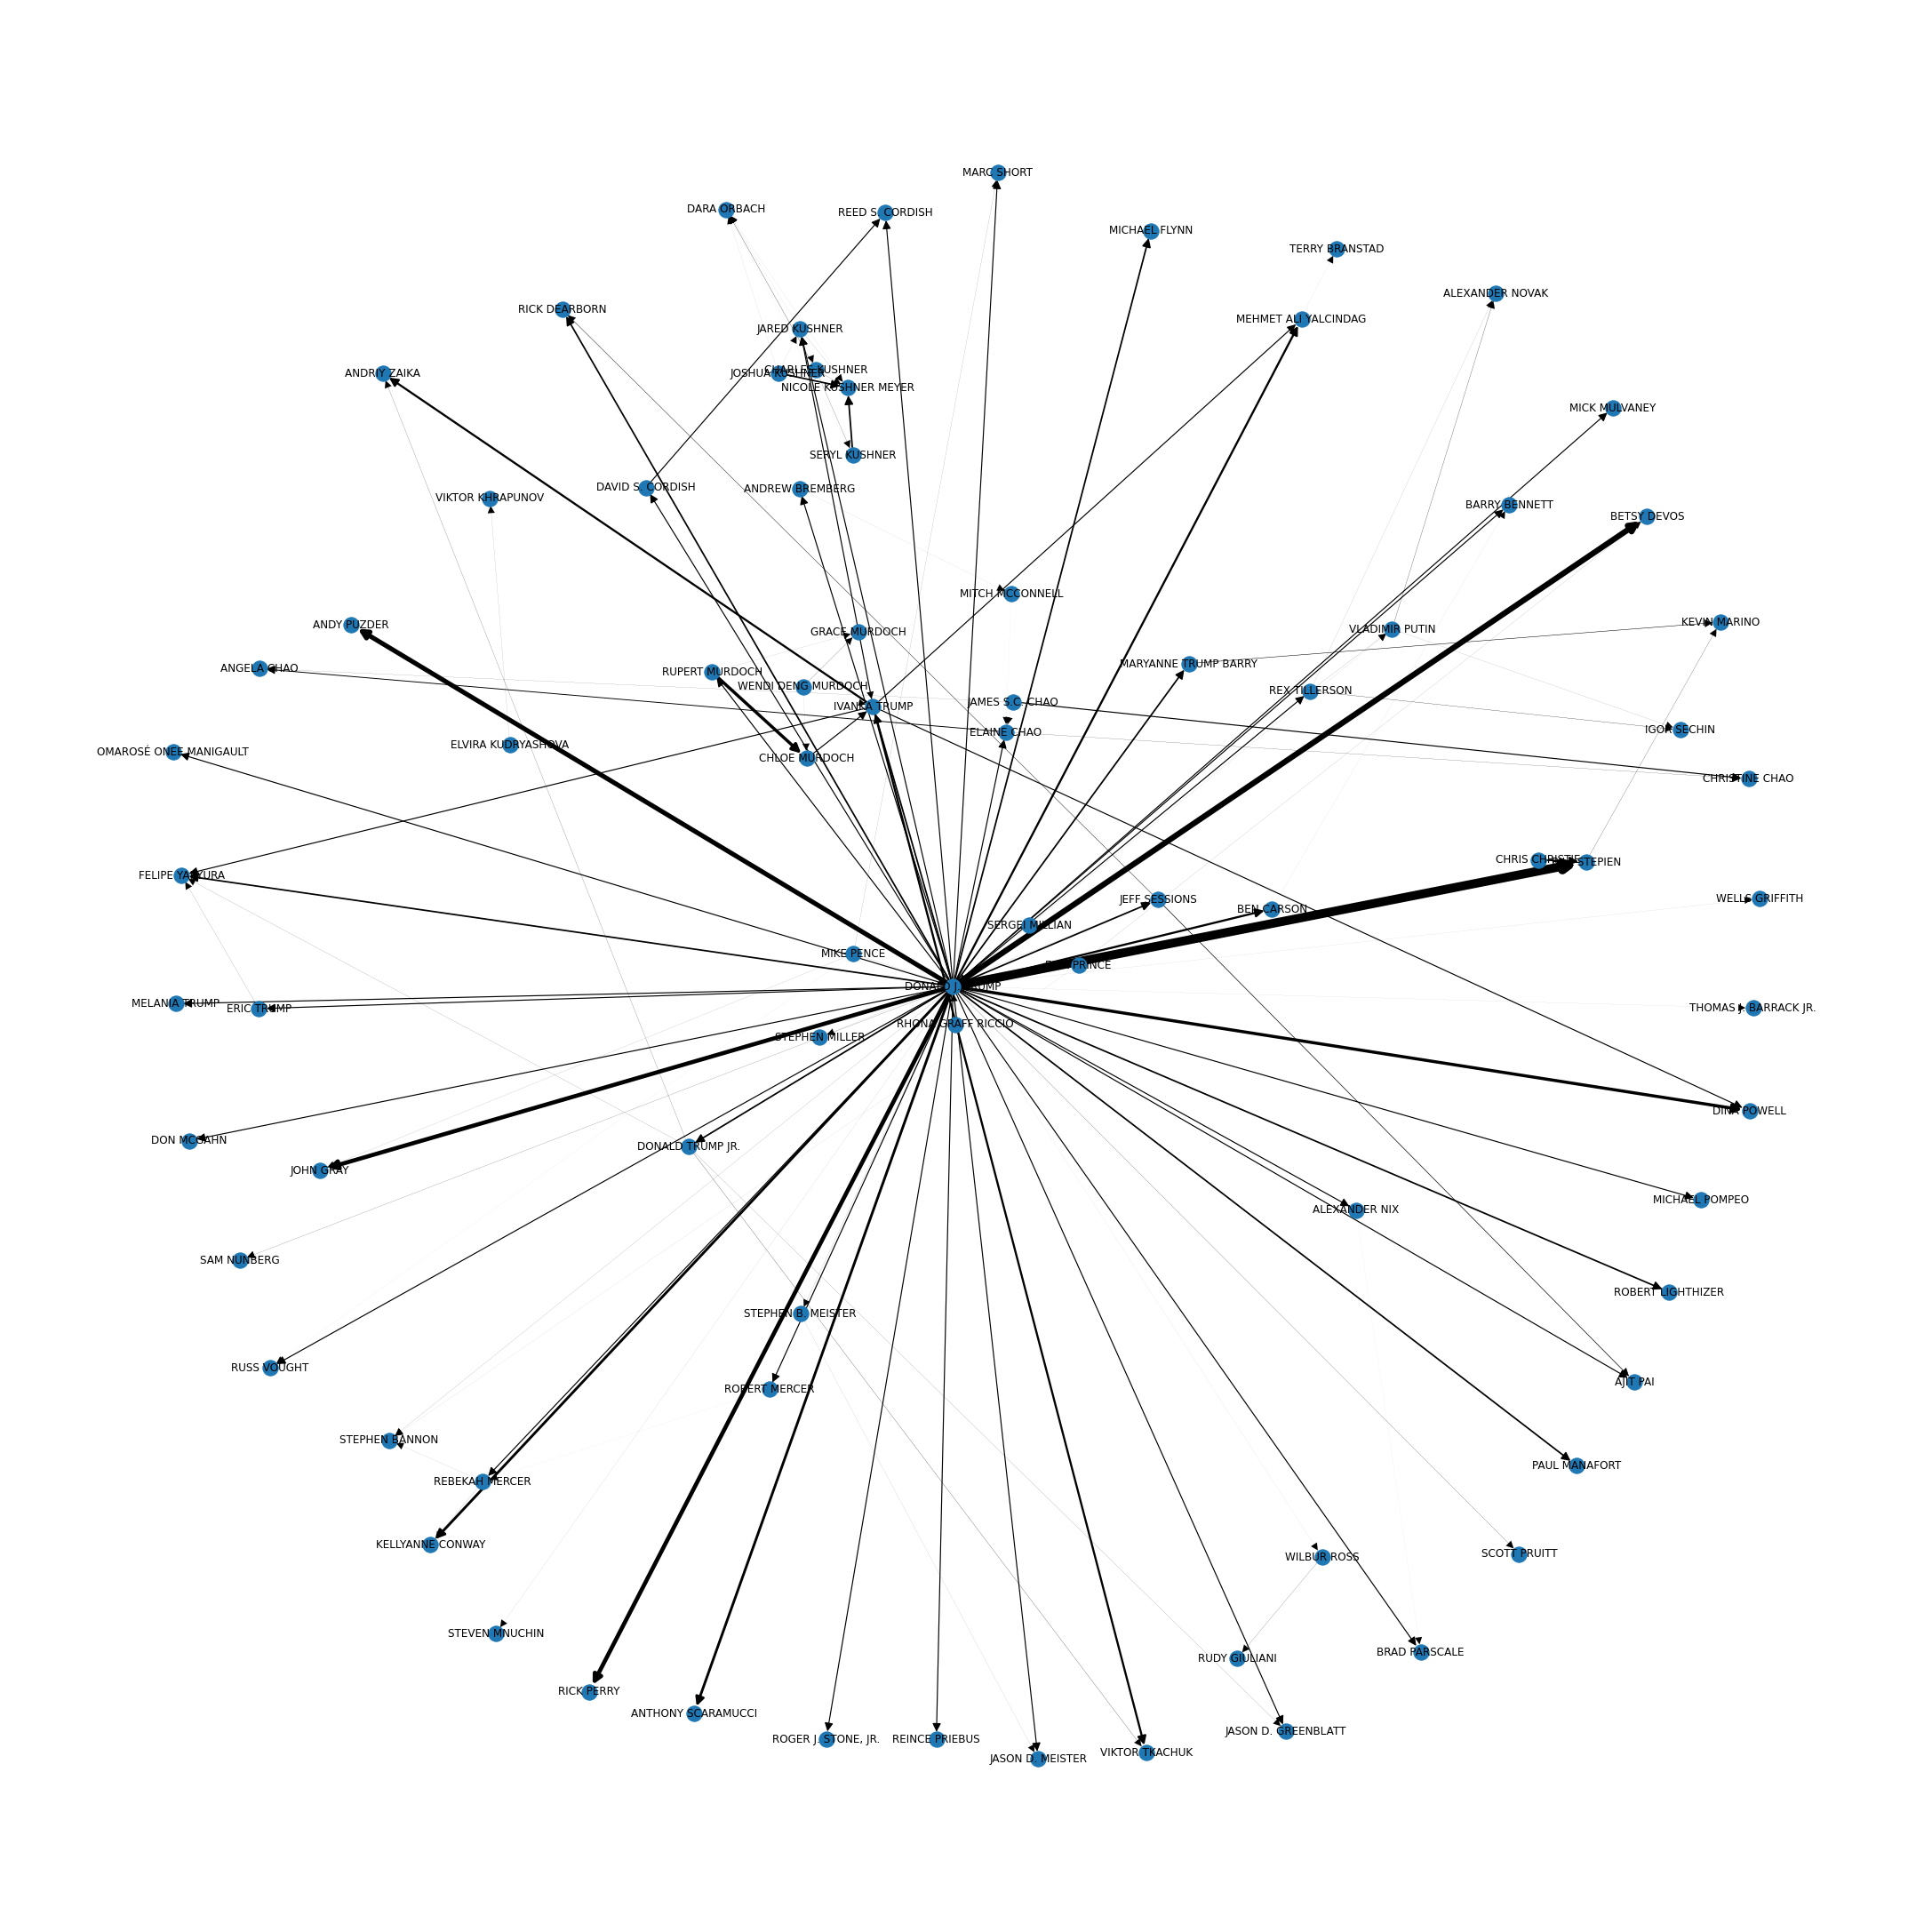

In [5]:
## networkx - weighted edges & arrows
weights=[]
for x in range(len(p_a1)):
    m=df3.loc[df3[0] == p_a1[x],'cnt'].iloc[0]
    n=df3.loc[df3[0] == p_b1[x],'cnt'].iloc[0]
    mn=0.05*m/10*n
    weights.append(mn)
weighted_eg=[]
for i in range(len(l)): # Create a weighted edge list
    weighted_eg.append([l[i][0],l[i][1],weights[i]])
NetxG3=nx.DiGraph()
NetxG3.add_weighted_edges_from(weighted_eg)
plt.figure(figsize=(30,30)) 
nx.draw(NetxG3,with_labels=True,width=weights,arrowsize=20)
plt.show()